In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Introduction

## 1.1 Laod Datasets

#### Note: I've chosen StackOverFlow surveys 2019 to investigate

In [3]:
directory= '/Users/hussam/Desktop/UDACITY/DataScientistND/P4/datasets'
file_names=[]
for filename in os.listdir(directory):
    file_names.append(filename)

In [5]:
pd.options.display.max_colwidth = 150

In [7]:
df_2019=pd.read_csv('survey_results_public_2019.csv')
df_2019_schema=pd.read_csv('survey_results_schema_2019.csv')

### 1.2 Invetigating The Data

In [8]:
df_2019.sample(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
10537,10584,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
70113,70557,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of LOWER quality than proprietary / closed source software",Employed full-time,Ukraine,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or software engineering",...,A lot less welcome now than last year,Tech meetups or events in your area;Courses on technologies you're interested in,36.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
84375,84900,I am a student who is learning to code,Yes,Less than once a month but more than once per year,The quality of OSS and closed source software is about the same,Employed part-time,Pakistan,"Yes, part-time",I never completed any formal education,NaN,...,A lot more welcome now than last year,Tech meetups or events in your area,NaN,Man,NaN,Straight / Heterosexual,NaN,Yes,Appropriate in length,Difficult


In [9]:
df_2019.shape

(88883, 85)

In [10]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [11]:
start= 60
end= 80

In [12]:
df_2019[df_2019.columns[start:end]].sample(3)

,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans
70158,Yes,Facebook,In real life (in person),Username,2008,Multiple times per day,Find answers to specific questions;Contribute to a library of information,Less than once per week,Stack Overflow was much faster,31-60 minutes,Yes,I have never participated in Q&A on Stack Overflow,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, I've heard of them, but I am not part of a private Q&A instance","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers,35.0,Man,No
51671,What?,Reddit,Neither,Username,NaN,Daily or almost daily,Find answers to specific questions,6-10 times per week,NaN,60+ minutes,Yes,I have never participated in Q&A on Stack Overflow,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,NaN,34.0,Man,No
47943,Yes,Reddit,Online,Username,2008,Daily or almost daily,Find answers to specific questions,6-10 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a private Q&A instance",Neutral,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,42.0,Man,No


In [13]:
df_2019_schema.iloc[start:end]

,Column,QuestionText
60,OffOn,Have you tried turning it off and on again?
61,SocialMedia,What social media site do you use the most?
62,Extraversion,Do you prefer online chat or IRL conversations?
63,ScreenName,What do you call it?
64,SOVisit1st,"To the best of your memory, when did you first visit Stack Overflow?"
65,SOVisitFreq,How frequently would you say you visit Stack Overflow?
66,SOVisitTo,I visit Stack Overflow to... (check all that apply)
67,SOFindAnswer,"On average, how many times a week do you find (and use) an answer on Stack Overflow?"
68,SOTimeSaved,"Think back to the last time you solved a coding problem using Stack Overflow, as well as the last time you solved a problem using a different reso..."
69,SOHowMuchTime,"About how much time did you save? If you're not sure, please use your best estimate."


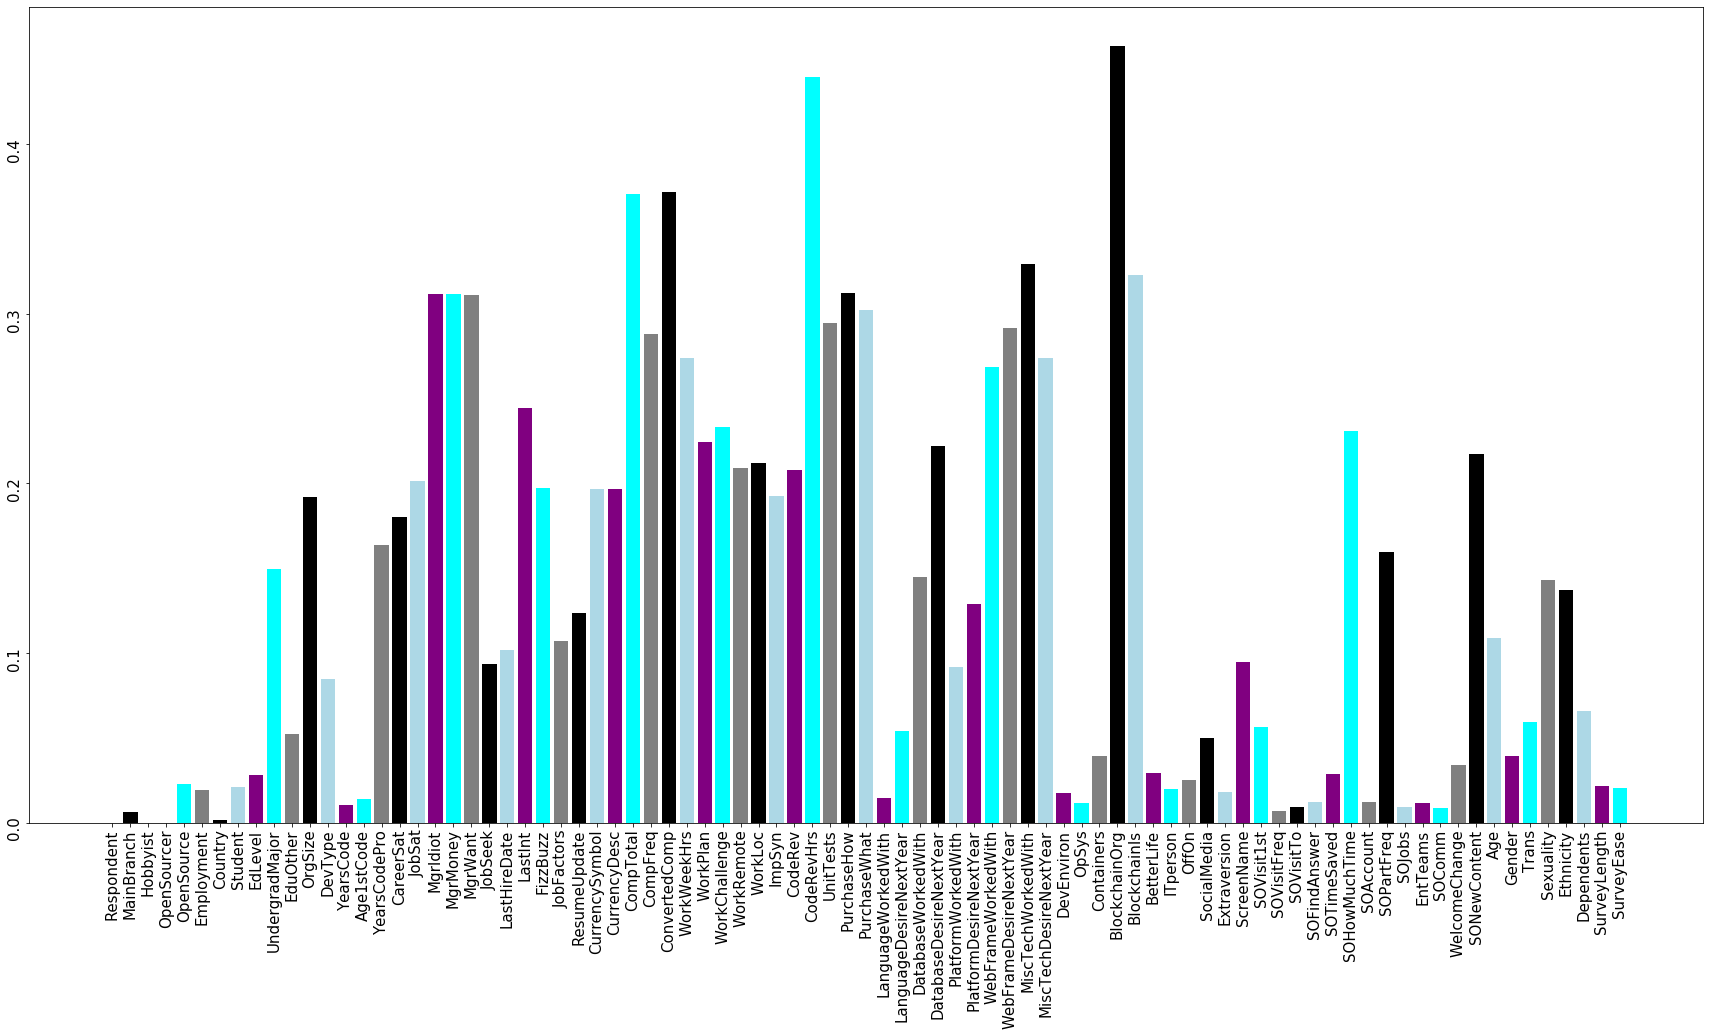

In [15]:
plt.figure(figsize=(30,15))
plt.tick_params(labelsize=15,labelrotation=90)
plt.bar(x= df_2019.columns[:86],
        height= df_2019.isnull().mean()[:86],
        color= ['gray','black','lightblue','purple','cyan']);

# 2. Apply CRISP-DM

## 2.1 Business Understanding
### Through Surveyinng the data i've chosen the following question to answer:
* 1- What are common Programming Languages that are paid the most?
* 2- What is the Most common language with hobbyist?
* 3- Does More years, means more salary?
* 4- Most Desired programming languages between developers?
* 5- SO reputation over years between surveyed entities?

## 2.2 Data Understanding
### I've found the following features that will contribute in answering the questions mensioned:
* 1- What are common Programming Languages that are paid the most?
* Features: ConvertedComp,CompFreq,LanguageWorkedWith,MainBranch


* 2- What is the most common language with hobbyist?
* Features: LanguageWorkedWith,Hobbyist


* 3- Does More years, means more salary?
* Features: YearsCodePro,ConvertedComp,CompFreq


* 4- Most desired programming languages between developers?
* Features: LanguageDesireNextYear,MainBranch


* 5- SO reputation over years between surveyed entities?
* Features: SOVisit1st

## 2.3 Prepare Data
### In this Section, We'll clean and extract the data needed for our analysis.

In [16]:
df_2019[['MainBranch', 'ConvertedComp', 'CompFreq', 'LanguageWorkedWith']].sample(3)

,MainBranch,ConvertedComp,CompFreq,LanguageWorkedWith
46512,"I am not primarily a developer, but I write code sometimes as part of my work",108846.0,Yearly,Python;Other(s):
25290,I am a student who is learning to code,NaN,NaN,Go;HTML/CSS;JavaScript
6427,I am a student who is learning to code,NaN,NaN,HTML/CSS;Java;JavaScript;SQL;Other(s):


In [17]:
df_2019.MainBranch.unique()

array(['I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am', nan],
      dtype=object)

In [18]:
# Re-encode MainBranch Features

main_branch={'I am a student who is learning to code': 'Student', 
             'I am not primarily a developer, but I write code sometimes as part of my work': 'Sometimes', 
             'I am a developer by profession': 'Developer', 
             'I code primarily as a hobby': 'Hobby', 
             'I used to be a developer by profession, but no longer am': 'Used to'}
df_2019.MainBranch.replace(main_branch,inplace=True)

In [20]:
# Re-encode LanguageWorkedWith
df_2019.LanguageWorkedWith.nunique()

20098

In [22]:
#Create a dataframe to calculate most paid programming language
language_l=[]
salary_l=[]

for i in np.arange(len(df_2019.LanguageWorkedWith)):
    
    if type(df_2019.LanguageWorkedWith[i]) != float:
        
        for j in np.arange(len(df_2019.LanguageWorkedWith[i].split(';'))):
            
            language_l.append(df_2019.LanguageWorkedWith[i].split(';')[j])

            if df_2019.CompFreq[i] == 'Monthly':
                salary= df_2019.ConvertedComp[i] *12
                
                
            elif df_2019.CompFreq[i] == 'Weekly':
                salary= df_2019.ConvertedComp[i] *52
                
            else:
                salary= df_2019.ConvertedComp[i]    

            salary_l.append(salary)
df_dic={'Language': language_l, 'Salary': salary_l}
salaries=pd.DataFrame(df_dic)

In [23]:
# preparing the data to caclulate the most common language with hobbyists.
hobbyist={'Yes':1,'No':0}
df_2019.Hobbyist.replace(hobbyist,inplace=True)
hob_df=df_2019.query('Hobbyist ==1')


In [25]:
# Prepare the data to answer the third question

In [26]:
df_2019[['YearsCodePro','ConvertedComp','CompFreq']].head()

,YearsCodePro,ConvertedComp,CompFreq
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,1,8820.0,Monthly
3,Less than 1 year,61000.0,Yearly
4,9,NaN,NaN


In [27]:
df_2019.YearsCodePro.unique()

array([nan, '1', 'Less than 1 year', '9', '3', '4', '10', '8', '2', '13',
       '18', '5', '14', '22', '23', '19', '35', '20', '25', '7', '15',
       '27', '6', '48', '12', '31', '11', '17', '16', '21', '29', '30',
       '26', '33', '28', '37', '40', '34', '24', '39', '38', '36', '32',
       '41', '45', '43', 'More than 50 years', '44', '42', '46', '49',
       '50', '47'], dtype=object)

In [29]:
intervals= {'Less than 1 year':0,'More than 50 years': 51}
df_2019.YearsCodePro.replace(intervals,inplace=True)
df_2019.YearsCodePro=df_2019.YearsCodePro.astype(float)
df_2019.YearsCodePro.head()

0    NaN
1    NaN
2    1.0
3    0.0
4    9.0
Name: YearsCodePro, dtype: float64

In [31]:
adj_comp=[]
for i in np.arange(len(df_2019.CompFreq)):
    if df_2019.CompFreq[i] == "Monthly":
        adj_comp.append(df_2019.ConvertedComp[i]*12)
    elif df_2019.CompFreq[i] == "Weekly":
        adj_comp.append(df_2019.ConvertedComp[i]*52)
    else:
        adj_comp.append(df_2019.ConvertedComp[i])

df_2019['ConvertedComp'] = adj_comp

In [32]:
# preparation for question four

In [33]:
df_2019[['LanguageDesireNextYear','MainBranch']].head()

,LanguageDesireNextYear,MainBranch
0,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,Student
1,C++;HTML/CSS;JavaScript;SQL,Student
2,Elixir;HTML/CSS,Sometimes
3,C;C#;JavaScript;SQL,Developer
4,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Developer


In [34]:
# Preperation for Q5

In [35]:
df_2019.SOVisit1st.sample(3)

62447    2015
78909    2015
28840    2013
Name: SOVisit1st, dtype: object

### 2.4 Modeling
##### Q1) What are common Programming Languages that are paid the most?

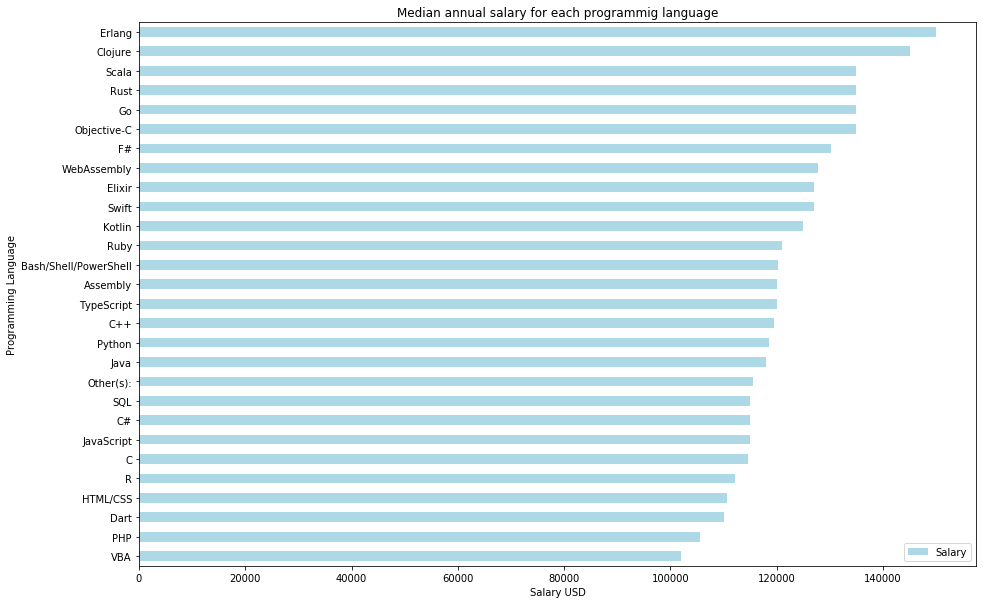

In [36]:
# Median Yearly salary per language
salaries.groupby(['Language']).median().sort_values('Salary').plot.barh(color= 'lightblue',figsize=(15,10));
plt.ylabel('Programming Language');
plt.xlabel('Salary USD');
plt.title('Median annual salary for each programmig language');

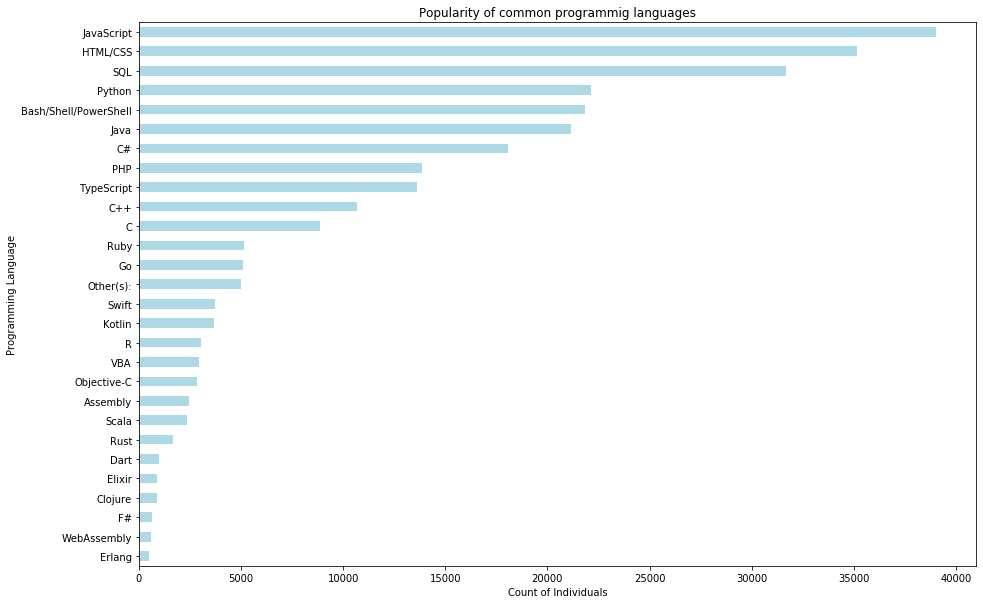

In [37]:
#Popularity of each language
salaries.groupby(['Language']).count().sort_values('Salary').plot.barh(legend=False,color= ['lightblue'],figsize=(15,10));
plt.ylabel('Programming Language');
plt.xlabel('Count of Individuals');
plt.title('Popularity of common programmig languages');

#### From the analysis made above, we can notice that the highest paid languages are Erlang & Clojure.

### Q2) What are the most common languages with hobbyists?

In [38]:
hob_df=df_2019.query('Hobbyist== 1')

In [39]:
hob_df.LanguageWorkedWith.nunique()

18370

In [41]:
hob_l=[]
for i in np.arange(len(hob_df.LanguageWorkedWith)):
    try:
        for j in np.arange(len(hob_df.LanguageWorkedWith[i].split(';'))):
            hob_l.append(hob_df.LanguageWorkedWith[i].split(';')[j])
    
    except:
        continue

In [42]:
hob_s=list(set(hob_l))
hob_c=[]
for i in np.arange(len(hob_s)):
    hob_c.append(hob_l.count(hob_s[i]))

In [101]:
hobb=pd.DataFrame({'language':hob_s,'counts':hob_c})

### Definning a function for plotting a bar chart:

In [102]:
def bar_plot(x_col,y_col,title,x_label,y_label,width=20,height=10,lab_size=15,lab_rotation=90):
    '''
    This funnction is to plot bar chart 
    '''
    plt.figure(figsize=(width,height))
    plt.tick_params(labelsize=lab_size,labelrotation=lab_rotation)
    plt.bar(x= x_col,
            height= y_col,
            color= ['gray','black','lightblue','purple','cyan']);
    plt.title(title,fontdict={'fontsize': 25});
    plt.xlabel(x_label,fontdict={'fontsize': 20});
    plt.ylabel(y_label,fontdict={'fontsize': 20})

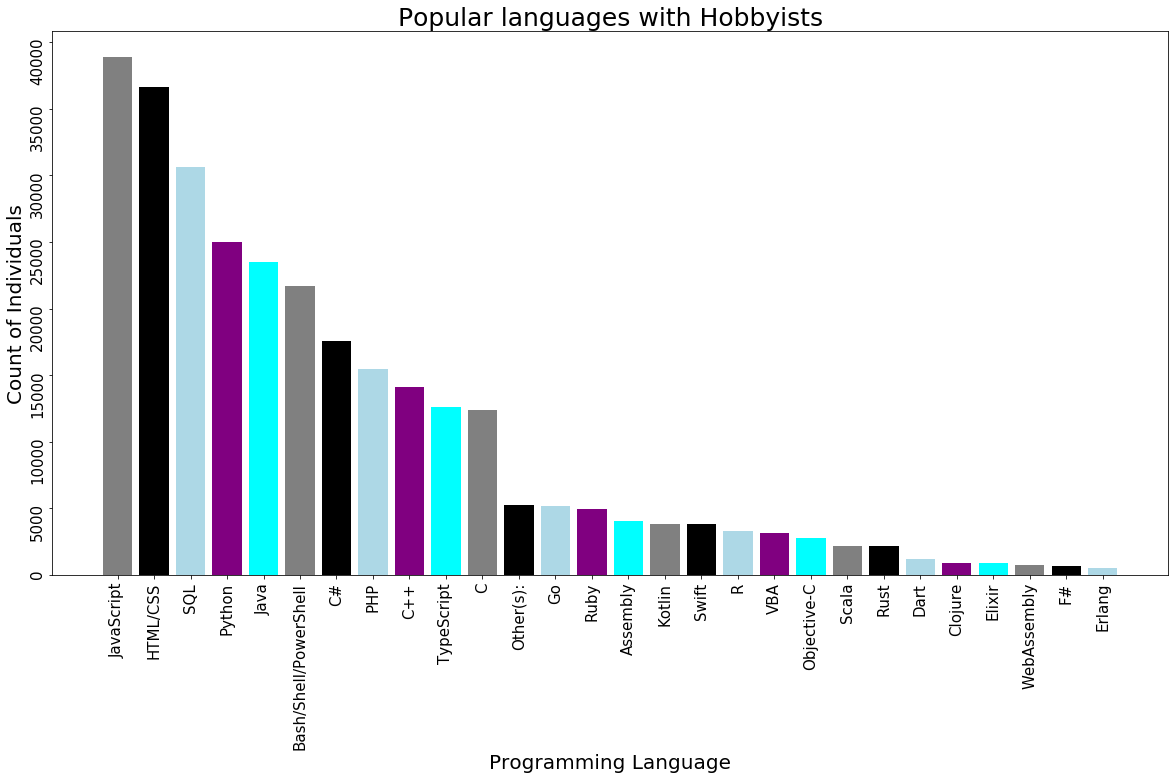

In [105]:
bar_plot(x_col=hobb.sort_values('counts',ascending=False).language.values,y_col=hobb.sort_values('counts',ascending=False)['counts'].values,
         title='Popular languages with Hobbyists',x_label='Programming Language',y_label='Count of Individuals')

### Q3)Does More years, means more salary?

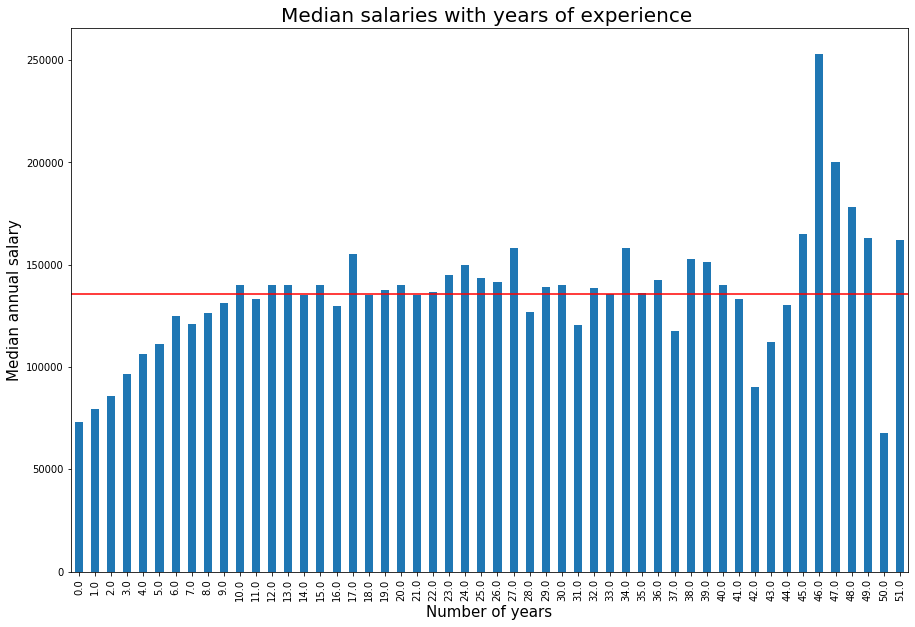

In [45]:
df_2019.groupby('YearsCodePro')['ConvertedComp'].median().plot.bar(figsize=(15,10));
plt.axhline(y=df_2019.groupby('YearsCodePro')['ConvertedComp'].median().mean(), color='r', linestyle='-');
plt.xlabel('Number of years',fontdict={'fontsize': 15});
plt.ylabel('Median annual salary',fontdict={'fontsize': 15});
plt.title('Median salaries with years of experience ',fontdict={'fontsize': 20});

In [46]:
df_2019[['ConvertedComp','YearsCodePro']].corr()

,ConvertedComp,YearsCodePro
ConvertedComp,1.000000,0.010352
YearsCodePro,0.010352,1.000000


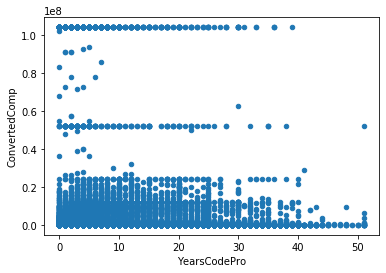

In [47]:
df_2019.plot.scatter('YearsCodePro','ConvertedComp');

#### As seen a bove we conclude that more years in coding doesn't necessarily imply more salary.

### Q4) Most desired programming languages between developers?

In [48]:
df_2019[['LanguageDesireNextYear','MainBranch']].head()

,LanguageDesireNextYear,MainBranch
0,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,Student
1,C++;HTML/CSS;JavaScript;SQL,Student
2,Elixir;HTML/CSS,Sometimes
3,C;C#;JavaScript;SQL,Developer
4,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Developer


In [49]:
df_dev= df_2019.query("MainBranch == 'Developer'")

In [50]:
dev_l=[]
for i in np.arange(len(df_dev.LanguageWorkedWith)):
    try:
        for j in np.arange(len(df_dev.LanguageWorkedWith[i].split(';'))):
            dev_l.append(df_dev.LanguageWorkedWith[i].split(';')[j])
    
    except:
        continue

In [51]:
dev_s=list(set(dev_l))
dev_c=[]
for i in np.arange(len(dev_s)):
    dev_c.append(dev_l.count(dev_s[i]))
dev=pd.DataFrame({'language':dev_s,'counts':dev_c})

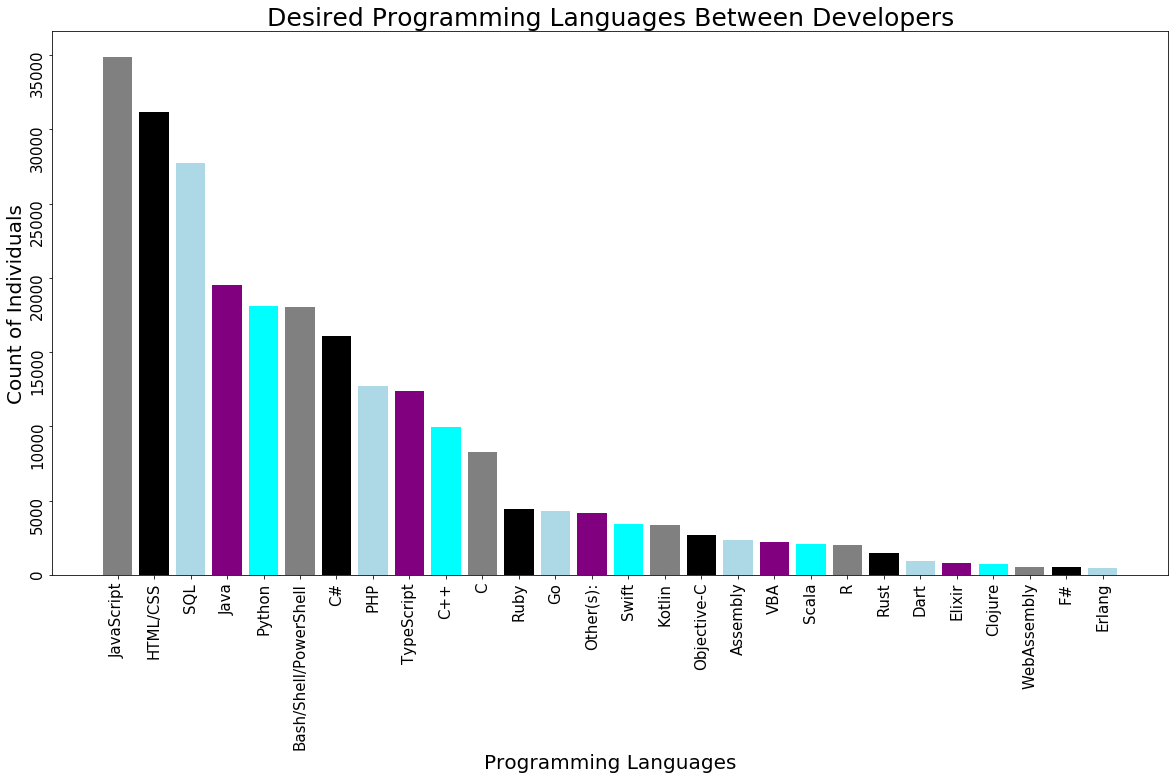

In [108]:
bar_plot(x_col=dev.sort_values('counts',ascending=False).language.values,
         y_col=dev.sort_values('counts',ascending=False)['counts'].values,
         title='Desired Programming Languages Between Developers',
         x_label='Programming Languages',
         y_label='Count of Individuals')

### Q5) SO reputation over years between surveyed entities?

In [54]:
df_2019.SOVisit1st.dropna(inplace=True)

In [55]:
df_2019.SOVisit1st.unique()

array(['2017', '2011', '2014', "I don't remember", '2012', '2013', '2010',
       '2018', '2008', '2016', '2015', '2009', '2019'], dtype=object)

In [58]:
df_2019.drop(df_2019.SOVisit1st[df_2019.SOVisit1st=="I don't remember"].index,inplace=True)
df_2019.SOVisit1st=df_2019.SOVisit1st.astype('float')
df_2019.SOVisit1st.dropna(inplace=True)
sov_s=list(df_2019.SOVisit1st.unique())
sol=list(df_2019.SOVisit1st)

In [66]:
sov_c=[]
for i in np.arange(len(sov_s)):
    sov_c.append(sol.count(sov_s[i]))
sov_df=pd.DataFrame({'year':sov_s,'counts':sov_c})

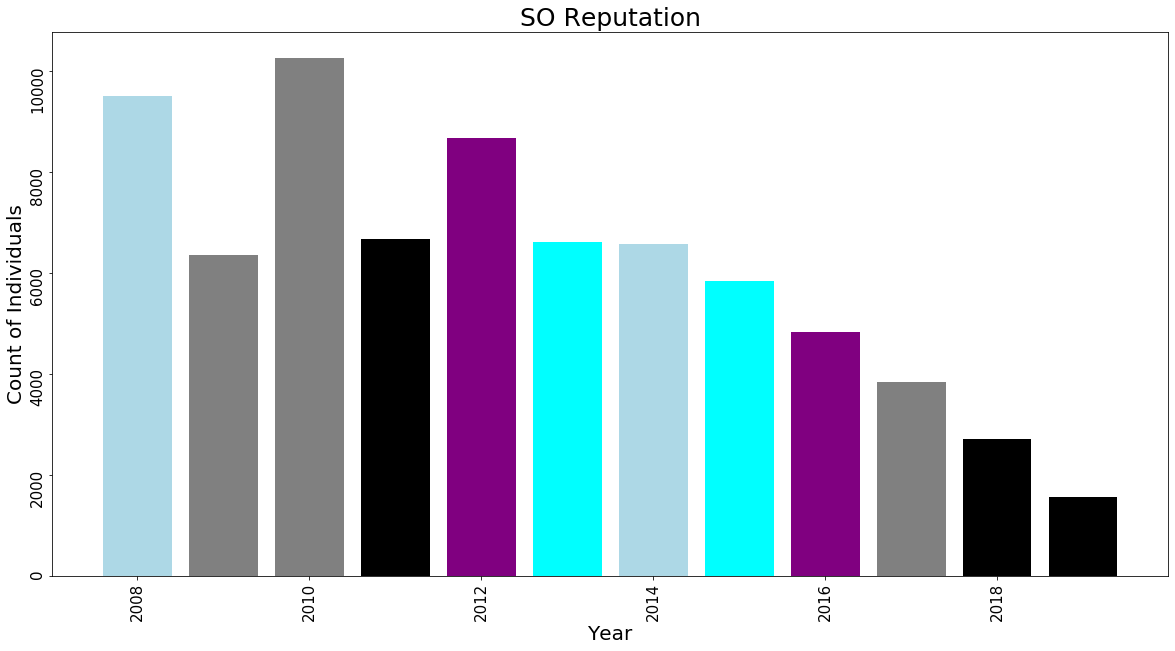

In [96]:
bar_plot(x_col=sov_df.year.values,
         y_col=sov_df.counts.values,
         title='SO Reputation',
         x_label='Year',
         y_label='Count of Individuals')